# **Redes Neurais e Aprendizado Profundo**

## Decaimento de taxa de aprendizado

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Definindo um modelo simples
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc = nn.Linear(10, 1)
    def forward(self, x):
        return self.fc(x)

In [ ]:
net =  Network()
print(net)

Network(
  (fc): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
# Criando dataset
input = torch.randn(100, 10)
target = torch.randn(100, 1)

In [ ]:
# Função perda
criterion = nn.MSELoss()

In [ ]:
# Otimizador e taxa de aprendizado inicial

init_lr = 0.1       # taxa de aprendizado inicial

optimizer = optim.SGD(net.parameters(), lr = init_lr)

# Parametros do decaimento da taxa de aprendizado

decay_rate = 0.5    # taxa de decaimento a cada queda
                    # decay_rate = 1, não há queda

decay_step = 5     # haverá queda a cada 10 épocas

In [ ]:
lrs = []
# Treinamento
epochs = 30
for epoch in range(epochs):
  net.train()

  output = net(input)
  loss = criterion(output, target)

  # Backpropagation e otimizador
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # aplicando o decaimento
  # atualiza se as épocas são condizentes com o decay_step
  if (epoch + 1) % decay_step == 0:
    # altera o parametro do learning rate no otimizador
    for param in optimizer.param_groups:
      param['lr'] = param['lr'] * decay_rate

  for param in optimizer.param_groups:
    lrs.append(param['lr'])


  print(f'Época [{epoch+1}/{epochs}], Perda: {loss.item():.4f}, Taxa de aprendizado: {optimizer.param_groups[0]["lr"]:.6f}')

Época [1/30], Perda: 1.1320, Taxa de aprendizado: 0.100000
Época [2/30], Perda: 1.0001, Taxa de aprendizado: 0.100000
Época [3/30], Perda: 0.9214, Taxa de aprendizado: 0.100000
Época [4/30], Perda: 0.8737, Taxa de aprendizado: 0.100000
Época [5/30], Perda: 0.8444, Taxa de aprendizado: 0.050000
Época [6/30], Perda: 0.8262, Taxa de aprendizado: 0.050000
Época [7/30], Perda: 0.8200, Taxa de aprendizado: 0.050000
Época [8/30], Perda: 0.8151, Taxa de aprendizado: 0.050000
Época [9/30], Perda: 0.8111, Taxa de aprendizado: 0.050000
Época [10/30], Perda: 0.8078, Taxa de aprendizado: 0.025000
Época [11/30], Perda: 0.8051, Taxa de aprendizado: 0.025000
Época [12/30], Perda: 0.8040, Taxa de aprendizado: 0.025000
Época [13/30], Perda: 0.8030, Taxa de aprendizado: 0.025000
Época [14/30], Perda: 0.8020, Taxa de aprendizado: 0.025000
Época [15/30], Perda: 0.8012, Taxa de aprendizado: 0.012500
Época [16/30], Perda: 0.8004, Taxa de aprendizado: 0.012500
Época [17/30], Perda: 0.8001, Taxa de aprendizado

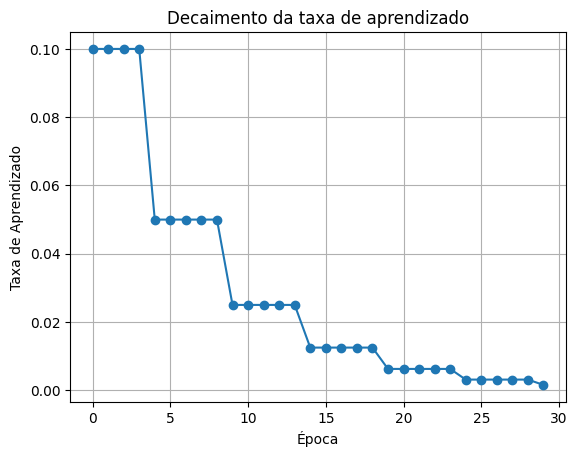

In [ ]:
plt.plot(range(epochs), lrs, marker='o')
plt.xlabel('Época')
plt.ylabel('Taxa de Aprendizado')
plt.title('Decaimento da taxa de aprendizado')
plt.grid(True)
plt.show()

## Scheduler

Também é possível implementar o decaimento através do scheduler do pytorch.

[Link](https://pytorch.org/docs/stable/optim.html)

In [ ]:
# Modelo
net = Network()

# Otimizador
init_lr = 0.1
optimizer = optim.SGD(net.parameters(), lr = init_lr)

# Learning rate scheduler
# Decaimento igual o definido anteriormente
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)   # step_size é o decay_step definido anteriormente
                                                                      # gamma é o decay_rate


# Treinamento
lrs = []
epochs = 30
for epoch in range(epochs):
    net.train()

    output = net(input)
    loss = criterion(output, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Step do scheduler
    scheduler.step()
    lrs.append(scheduler.get_last_lr())

    print(f'Época [{epoch+1}/{epochs}], Perda: {loss.item():.4f}, Taxa de aprendizado: {scheduler.get_last_lr()[0]:.6f}')

Época [1/30], Perda: 1.3630, Taxa de aprendizado: 0.100000
Época [2/30], Perda: 1.1558, Taxa de aprendizado: 0.100000
Época [3/30], Perda: 1.0310, Taxa de aprendizado: 0.100000
Época [4/30], Perda: 0.9527, Taxa de aprendizado: 0.100000
Época [5/30], Perda: 0.9020, Taxa de aprendizado: 0.050000
Época [6/30], Perda: 0.8683, Taxa de aprendizado: 0.050000
Época [7/30], Perda: 0.8564, Taxa de aprendizado: 0.050000
Época [8/30], Perda: 0.8464, Taxa de aprendizado: 0.050000
Época [9/30], Perda: 0.8381, Taxa de aprendizado: 0.050000
Época [10/30], Perda: 0.8311, Taxa de aprendizado: 0.025000
Época [11/30], Perda: 0.8252, Taxa de aprendizado: 0.025000
Época [12/30], Perda: 0.8227, Taxa de aprendizado: 0.025000
Época [13/30], Perda: 0.8203, Taxa de aprendizado: 0.025000
Época [14/30], Perda: 0.8182, Taxa de aprendizado: 0.025000
Época [15/30], Perda: 0.8162, Taxa de aprendizado: 0.012500
Época [16/30], Perda: 0.8144, Taxa de aprendizado: 0.012500
Época [17/30], Perda: 0.8136, Taxa de aprendizado

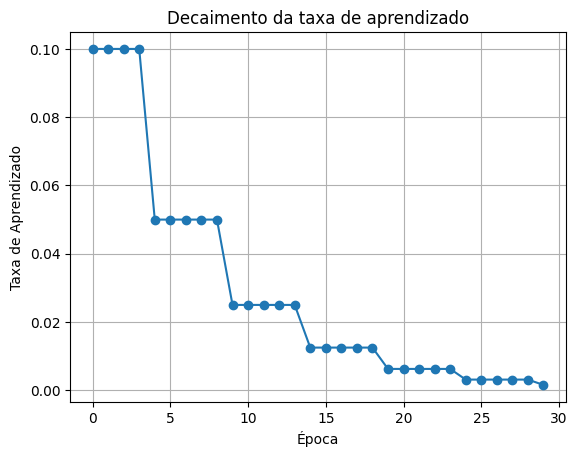

In [ ]:
plt.plot(range(epochs), lrs, marker='o')
plt.xlabel('Época')
plt.ylabel('Taxa de Aprendizado')
plt.title('Decaimento da taxa de aprendizado')
plt.grid(True)
plt.show()

## Testando com outros dois tipos de scheduler para o banco de dados de cancer de mama.

* [ExponentialLR](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ExponentialLR.html)
* [CosineAnnealingLR](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.CosineAnnealingLR.html)

In [ ]:
# Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

dataframe_breast_cancer = pd.read_csv('/content/drive/MyDrive/Aulas Mestrado/Redes Neurais/data.csv')
cols_dataframe = list(dataframe_breast_cancer)

dataframe_breast_cancer['label'] = (dataframe_breast_cancer['diagnosis'] == 'M').astype(float)

col_features = list(dataframe_breast_cancer)
col_features.remove('Unnamed: 32')
col_features.remove('id')
col_features.remove('diagnosis')

train, test = train_test_split(dataframe_breast_cancer[col_features], test_size=0.2)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


class ClassificationDataset(Dataset):
    def __init__(self, features, labels=None):
        self.X = torch.tensor(np.array(features), dtype=torch.float32)
        self.y = torch.tensor(np.array(labels), dtype=torch.float32) if labels is not None else None

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        data = self.X[idx]

        if self.y is not None:
           return (data, self.y[idx])
        else:
           return data

bc_train = ClassificationDataset(train.iloc[:, :-1], train.loc[:, 'label'])
bc_test = ClassificationDataset(test.iloc[:, :-1], test.loc[:, 'label'])

train_dataloader = DataLoader(bc_train, batch_size=1, shuffle=True)
test_dataloader = DataLoader(bc_test, batch_size=2, shuffle=True)

In [ ]:
# Testando outros schedulers

scheduler1 = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

scheduler2 = lr_scheduler.CosineAnnealingLR(optimizer,T_max = 10, eta_min=0.000001)

In [ ]:
# Modelo rede neural: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(30,16)
        self.l2 = torch.nn.Linear(16,4)
        self.l3 = torch.nn.Linear(4,1)

        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

model = Model()

criterion = torch.nn.BCELoss(reduction='sum')

In [ ]:
# Treinamento com scheduler 1

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

lrs = []
epochs = 100
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for inputs, labels in train_dataloader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels.unsqueeze(1))
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  # Step do scheduler
  scheduler1.step()
  lrs.append(scheduler1.get_last_lr())

  #print(f"Época [{epoch + 1}/{epochs}], Perda: {running_loss / len(train_dataloader)}, Taxa de aprendizado: {scheduler1.get_last_lr()[0]:.6f}")

# Avaliação
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for inputs, labels in test_dataloader:
    outputs = model(inputs)
    predicted = (outputs >= 0.5).squeeze().float()
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Acurácia do teste: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Acurácia do teste: 94.74%


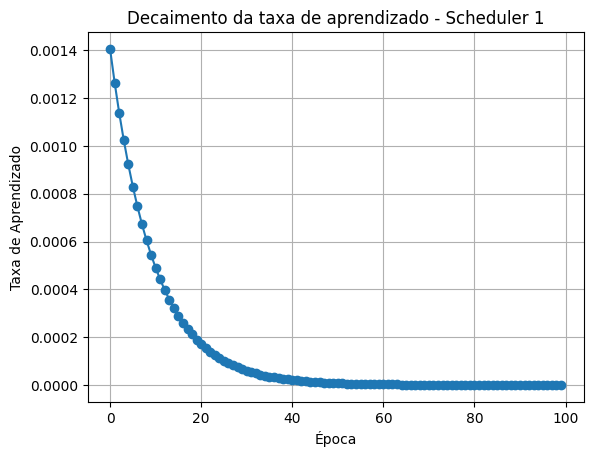

In [ ]:
plt.plot(range(epochs), lrs, marker='o')
plt.xlabel('Época')
plt.ylabel('Taxa de Aprendizado')
plt.title('Decaimento da taxa de aprendizado - Scheduler 1')
plt.grid(True)
plt.show()

In [ ]:
# Treinamento com scheduler 2

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

lrs = []
epochs = 100
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for inputs, labels in train_dataloader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels.unsqueeze(1))
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  # Step do scheduler
  scheduler2.step()
  lrs.append(scheduler2.get_last_lr())

  #print(f"Época [{epoch + 1}/{epochs}], Perda: {running_loss / len(train_dataloader)}, Taxa de aprendizado: {scheduler1.get_last_lr()[0]:.6f}")

# Avaliação
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for inputs, labels in test_dataloader:
    outputs = model(inputs)
    predicted = (outputs >= 0.5).squeeze().float()
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Acurácia do teste: {accuracy * 100:.2f}%")

Acurácia do teste: 92.11%


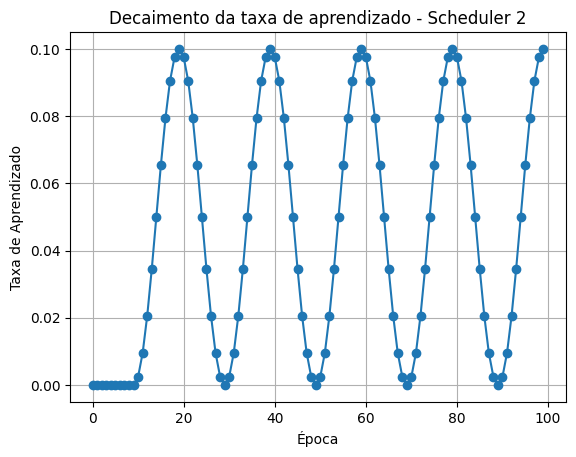

In [ ]:
plt.plot(range(epochs), lrs, marker='o')
plt.xlabel('Época')
plt.ylabel('Taxa de Aprendizado')
plt.title('Decaimento da taxa de aprendizado - Scheduler 2')
plt.grid(True)
plt.show()